In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [9]:
def get_dataframes(query, databases):
    dataframes = []
    for database in databases:
        db = sqlite3.connect(database)
        dataframes += [pd.read_sql_query(query, db)]
    return pd.concat(dataframes)

In [10]:
query = 'select job_type, tot_time from tasks'
databases = [
             'lambda_funcx3.db', 'cold_starts.db'
]
tasks = get_dataframes(query, databases)

In [11]:
# NOTE multiplying by 100 and not 1000 b/c off by factor of 10. 
# tasks.head()
# tasks['batch_size'] = tasks.tag.str.extract('(\d+)')
# tasks['task_time'] = tasks.completion_time / tasks.batch_size.astype(int)
tasks [tasks['job_type'] == 'cold-azure']

,job_type,tot_time
2,cold-azure,0.204843
6,cold-azure,3.777247
10,cold-azure,0.289649
14,cold-azure,3.892200
18,cold-azure,0.183110
22,cold-azure,5.251943
26,cold-azure,0.218129
30,cold-azure,9.679199
34,cold-azure,9.279623
38,cold-azure,3.735649


In [12]:
tags = tasks["job_type"].unique()
tags

array(['lambda', 'google', 'azure', 'funcx', 'cold-lambda', 'cold-google',
       'cold-azure', 'cold-funcx'], dtype=object)

0.11386806920744766
0.12225596066294103
0.1257232077542754
0.07586415485479403


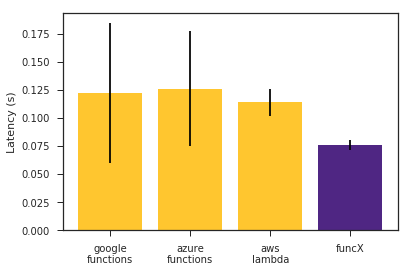

In [13]:
aws_mean = np.mean(tasks.loc[(tasks.job_type == "lambda")]).tot_time
aws_std = np.std(tasks.loc[(tasks.job_type == "lambda")]).tot_time
print(aws_mean)

google_mean = np.mean(tasks.loc[(tasks.job_type == "google")]).tot_time
google_std = np.std(tasks.loc[(tasks.job_type == "google")]).tot_time
#aws_times = aws_times["tot_time"]
# print(aws_std)
print(google_mean)

azure_mean = np.mean(tasks.loc[(tasks.job_type == "azure")]).tot_time
azure_std = np.std(tasks.loc[(tasks.job_type == "azure")]).tot_time
print(azure_mean)

funcx_mean = np.mean(tasks.loc[(tasks.job_type == "funcx")]).tot_time
funcx_std = np.std(tasks.loc[(tasks.job_type == "funcx")]).tot_time
print(funcx_mean)

labs = ["google\nfunctions", "azure\nfunctions", "aws\nlambda", "funcX"]
x_pos = np.arange(len(labs))
means = [google_mean, azure_mean, aws_mean, funcx_mean]
stds = [google_std, azure_std, aws_std, funcx_std]

f = plt.figure()
plt.bar(x_pos, means, yerr=stds, tick_label=labs, capsize=10, color=["#FFC62F", "#FFC62F", "#FFC62F", "#4F2683"])

plt.ylabel("Latency (s)")

#f.savefig('lambda-latency.png', dpi=1000)

plt.show()
# plt.show()

10.802587134219786


<Figure size 432x288 with 0 Axes>

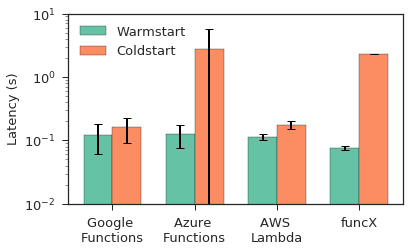

In [17]:
plt.clf()


aws_cold_mean = np.mean(tasks.loc[(tasks.job_type == "cold-lambda")]).tot_time
aws_cold_std = np.std(tasks.loc[(tasks.job_type == "cold-lambda")]).tot_time

google_cold_mean = np.mean(tasks.loc[(tasks.job_type == "cold-google")]).tot_time
google_cold_std = np.std(tasks.loc[(tasks.job_type == "cold-google")]).tot_time
#aws_times = aws_times["tot_time"]
# print(aws_std)

azure_cold_mean = np.mean(tasks.loc[(tasks.job_type == "cold-azure")]).tot_time
azure_cold_std = np.std(tasks.loc[(tasks.job_type == "cold-azure")]).tot_time

funcx_cold_mean = np.mean(tasks.loc[(tasks.job_type == "cold-funcx")]).tot_time
funcx_cold_std = np.std(tasks.loc[(tasks.job_type == "cold-funcx")]).tot_time
print(funcx_cold_std)

funcx_cold_data = [2.311, 2.298, 2.289, 2.283, 2.31, 2.288, 2.307, 2.254, 2.283, 2.282, 
                           2.279, 2.308, 2.297, 2.299, 2.289, 2.302, 2.314, 2.294, 2.327, 2.284, 
                           2.308, 2.28, 2.295, 2.302, 2.292, 2.315, 2.311, 2.312, 2.283, 2.291, 
                           2.329, 2.304, 2.327, 2.333, 2.305, 2.28, 2.271, 2.286, 2.274, 2.267, 
                           2.291, 2.29, 2.26, 2.278, 2.31, 2.293, 2.3, 2.3, 2.317, 2.291, 2.295, 2.295, 
                           2.268, 2.268, 2.29, 2.294, 2.294, 2.314, 2.286, 2.294, 2.286, 2.279, 2.313, 
                           2.279, 2.301, 2.271, 2.3, 2.269, 2.299, 2.306, 2.312, 2.293, 2.307, 2.246, 2.267, 
                           2.277, 2.288, 2.282, 2.273, 2.275, 2.29, 2.3, 2.321, 2.281, 2.307, 2.276, 2.307, 
                           2.297, 2.292, 2.318, 2.274, 2.281, 2.297, 2.263, 2.294, 2.267, 2.307, 2.253, 2.295, 2.32]
funcx_cold_mean = np.mean(funcx_cold_data)
funcx_cold_std = np.std(funcx_cold_data)

N = 4
ind = np.arange(N)    # the x locations for the groups

fig, ax = plt.subplots(figsize=(6, 3.5))
width = 0.35
cold_means = [google_cold_mean,azure_cold_mean,aws_cold_mean,
              funcx_cold_mean
             ]
cold_stds = [google_cold_std, azure_cold_std, aws_cold_std, 
             funcx_cold_std
            ]

p1 = ax.bar(ind, means, width, yerr=stds, 
            tick_label=labs, capsize=4, label='Warmstart', 
            ecolor='black', 
            edgecolor='black',
            error_kw=dict(elinewidth=2, capthick=1))
p2 = ax.bar(ind+width, cold_means, width, yerr=cold_stds, 
            capsize=4, label='Coldstart', ecolor='black', edgecolor='black',
           error_kw=dict(elinewidth=2, capthick=1))
ax.set_xticks(ind + width / 2)
ax.set_yscale('log')
ax.set_ylim(0.01, 10)
ax.set_xticklabels(('Google \nFunctions', 'Azure \nFunctions', 'AWS \nLambda', 'funcX'), fontsize=13)
plt.legend(fontsize=13, loc='upper left', fancybox=True, shadow=True, ncol=1)
plt.ylabel("Latency (s)", fontsize=13)
ax.tick_params(axis = 'y', which = 'major', labelsize = 13)
# p1.ylabel("hey")
plt.savefig('../png/lambda-latency.png', bbox_inches = "tight", dpi=1000)


